# Customer  Churn Analysis Project

## Introduction
Tthis project analyzes customer churn for a telecom company using the `Telco Customer Churn` Dataset from Kaggle. The goual is to identify churn patterns, predict Churn and visualise insight in PowerBI.

## Dataset overview
The dataset use for this project is the **Telco Customer Churn** dataset from kaggle. It contains information about telecom customers, including demographics, services, contrast type, billing details, and whether they churned (left the company).
The goal is to analyse churn paterns and predict customer churn. Dataset combined with USA states data from mockaroo for georaphic analysis.

**Source**: [Kaggle Telco Customer Churn Dataset] (http://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Key Features**:
- Customer demographics (gender, senior citizen status)
- Services (phone, internet, streaming, backup, protection)
- Billing (Monthly charges, Total charges)
- Contrast (Month to Month, One year, Two years)
- Churn Status (Yes/No)





## Dataset preprocessing
- **Merging dataset**: before displaying dataset, we merge randomly our dataset with 50 states of United State that we will use for our future analysis and visualization later.
- Correct data type (e.g. `TotalCharges`)
- Check all missing values and we gonna delete all missing values row,
- List unique values for categorical features,
- Check duplicated row,
- Map churn value on new column.

---
### First 5 Rows
The table below shows the first 5 rows of dataset to illustrate its structure.

### Dataset information
Display information about all dataset features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

#For plotting result
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (7,3)

custom_palette = {'Yes': 'red', 'No': 'green'}

#Merge dataset with state randomly
def merge_data_with_random_states(main_data_file, states_file, output_csv):
    # --- Step 1: Load your main 7000 lines of data ---
    try:
        df_main = pd.read_csv(main_data_file)
        print(f"Successfully loaded '{main_data_file}'. Shape: {df_main.shape}")
    except FileNotFoundError:
        print(f"Error: Main data file '{main_data_file}' not found.")
        return
    except Exception as e:
        print(f"Error loading main data file: {e}")
        return

    # --- Step 2: Load states from the text file ---
    states = []
    try:
        with open(states_file, 'r') as f:
            for line in f:
                state = line.strip() # Remove leading/trailing whitespace including newlines
                if state: # Ensure line is not empty
                    states.append(state)
        print(f"Successfully loaded {len(states)} states from '{states_file}'.")
    except FileNotFoundError:
        print(f"Error: States file '{states_file}' not found.")
        return
    except Exception as e:
        print(f"Error loading states file: {e}")
        return

    # --- Step 3: Generate a random list of states for each row in main data ---
    if len(states) > 0:
        random_states_for_rows = random.choices(states, k=len(df_main))
        print(f"Generated a list of {len(random_states_for_rows)} random states.")
    else:
        print("No states loaded, cannot assign random states. Exiting.")
        return

    # --- Step 4: Add the random states as a new column to the main DataFrame ---
    df_main['State'] = random_states_for_rows
    print(f"Added 'State' column. New DataFrame shape: {df_main.shape}")
    
    # --- Step 5: Save the combined DataFrame to a new CSV file ---
    try:
        df_main.to_csv(output_file, index=False) # index=False to prevent writing DataFrame index as a column
        print(f"\nSuccessfully saved the merged data to '{output_file}'")
    except Exception as e:
        print(f"Error saving output file: {e}")
        
    return df_main
        
main_data_csv = './Data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
states_txt = './Data/States.txt'          
output_file = './Data/Telco-Customer-Churn.csv' # output CSV



main_data = merge_data_with_random_states(main_data_csv, states_txt, output_file)
print("\nFirst five rows of dataset:")
print("============================")
display(main_data.head())

Successfully loaded './Data/WA_Fn-UseC_-Telco-Customer-Churn.csv'. Shape: (7043, 21)
Successfully loaded 50 states from './Data/States.txt'.
Generated a list of 7043 random states.
Added 'State' column. New DataFrame shape: (7043, 22)

Successfully saved the merged data to './Data/Telco-Customer-Churn.csv'

First five rows of dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,State
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Louisiana
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Pennsylvania
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Wisconsin
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Nevada
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Idaho


In [5]:
#Display basic info
print("Display dataset basic information:")
print("-" * 35)
main_data.info()

Display dataset basic information:
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          

Displaying in the output above, we perceive that all features belong with its exact type expect **TotalCharges** features instead numeric it typed as object.

## Dataset cleaning

In [14]:
#Convert TotalCharges to numeric and convert all problematic row to NaN
main_data['TotalCharges'] = pd.to_numeric(main_data['TotalCharges'], errors = 'coerce')

#Check again missing value
print("Ckeck if there is missing value again:")
print("-" * 37)
print(main_data.isnull().sum())

#Dop all rows with missing values
main_data.dropna(subset = ['TotalCharges'], inplace = True)

#listing unique values for categorical columns
cat_col = main_data.select_dtypes(include = 'object').columns
print(f"\n List unique values for categorical columns:")
print("-" * 45)
for col in cat_col:
    print(f"{col}: {main_data[col].unique()}")
    
#Check duplicated rows
print("-" * 30)
print(f'\nNumber of duplicate rows: {main_data.duplicated().sum()}')

#Create column fot churn value mapped
main_data['Churn_encoded'] = main_data['Churn'].map({'Yes': 1, 'No': 0})

Ckeck if there is missing value again:
-------------------------------------
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
State               0
Churn_encoded       0
dtype: int64

 List unique values for categorical columns:
---------------------------------------------
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Y

## Exploratory Data Analysis

For this section, we get data summary for both numeric and categorical features. After, we visualize Churn paterns.

In [28]:
# Step: data exploration
#Symmary stat
print('Numerical features summary:')
print('--------------------------')
print(main_data.iloc[:, :-1].describe())
print("\nCategorical features summary:")
print('------------------------------')
print(main_data.describe(include = 'object'))

Numerical features summary:
--------------------------
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Categorical features summary:
------------------------------
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7032   7032    7032       7032         7032          7032   
unique        7032      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq   

**Comment:** Majority of customers are less than 60 years old. Only 25% of them have more than 50 months tenure. Customers pay an average of 64.80$ every months. Most of them are men, do not have partener or dependents and use phone service. Fiber optic internet is the most common internet service and most customers opt for moth to month contrast and paperline billing. The most frequent payement method is Electronic check and the majority do not churn.

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


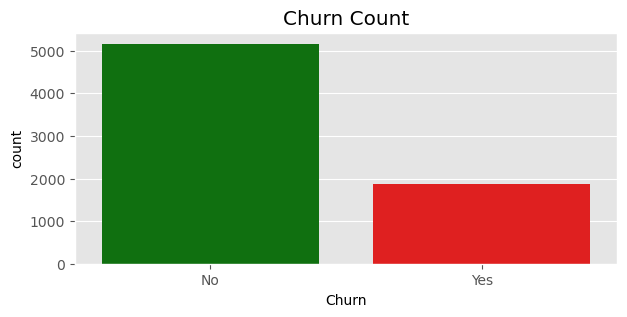

In [10]:
#Target variable analysis

#Percentage of churn
churn_rate = main_data['Churn'].value_counts(normalize= True) * 100
print(churn_rate)

sns.countplot(x= 'Churn', data= main_data, palette= custom_palette)
plt.title('Churn Count')
plt.show()

**Comment:** The dataset reveals a churners rate of ~26.57% only, meaning roughly 1 out of every 4 customers has left the service. On the over hand, ~73.42% of customers have stayed loyal.


Numerical features:
-------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


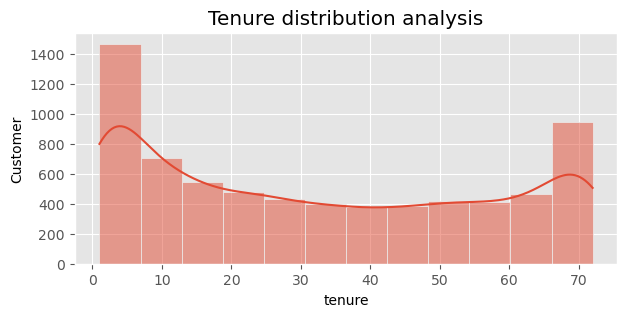

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

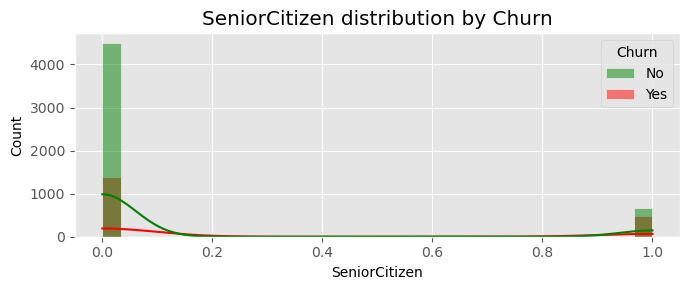

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

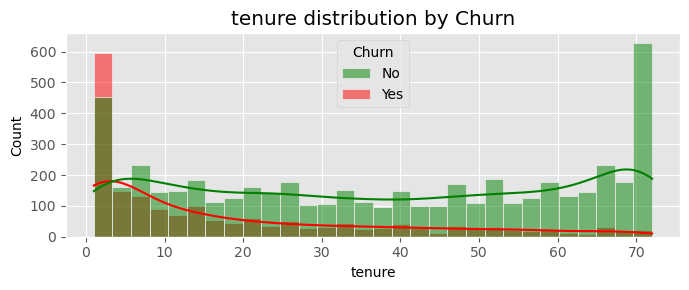

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

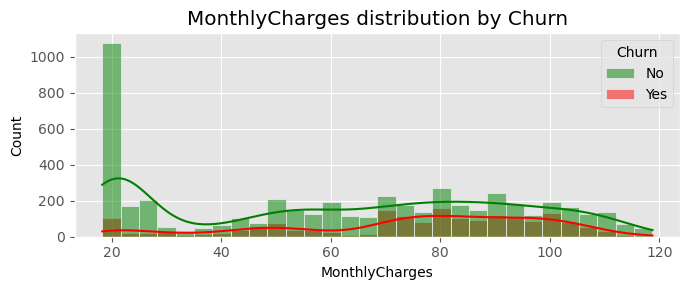

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

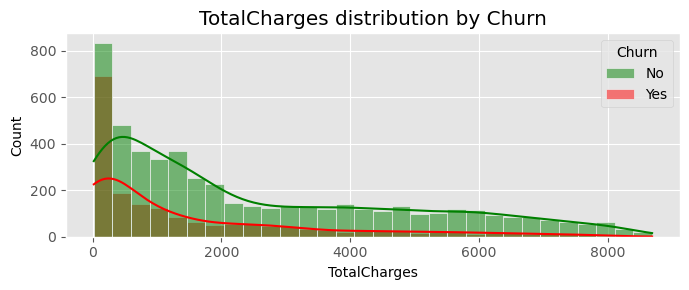

In [41]:
print('\nNumerical features:')
print("-" * 25)
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
sns.histplot(data= main_data, x = 'tenure', bins= 12, kde= True)
plt.title('Tenure distribution analysis')
plt.ylabel('Customer')
plt.show()
for col in num_cols:
    sns.histplot(data= main_data, x = col, hue = 'Churn', kde = True, bins = 30, palette= custom_palette)
    plt.title(f'{col} distribution by Churn')
    plt.tight_layout()
    plt.show()

**Comment:** Customer by tenure plot shows that most of our customers are at short tenure and it decrease till 50 months of tenure. Histogram plot confirm that they are les than 60 years olds. Tenure distribution by churn reveals that new customers are most likely to churn, especially within their first year.Long term customer rarely churn, suggesting that customer retention improves significantly with time. Customers that have monthly charges between 70 Dollars  to 100 Dollars are most lakely to churn, others are rarely. Those who churn tend to have low total charges, meaning they likely left early before becoming high-value customers.Clients with hight total charges almost never churn. This strongly aligns with the tenure distribution analysis: churn happens mostly in the early stage of the customer lifecycle.

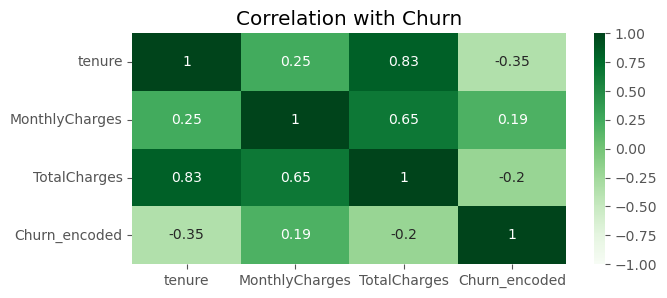

In [17]:
#Correlation matrix
corr = main_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_encoded']].corr()
sns.heatmap(corr, annot = True, cmap = 'Greens', vmin= -1, vmax= 1)
plt.title('Correlation with Churn')
plt.show()

**Comment:**
- **tenure** has a strong positive correlation with TotalCharges and a moderate positive correlation with MonthlyCharges but a negative with Churn, suggesting longer tenure reduces churn likelihood.
- **MonthlyCharges** shows moderate positive correlation with TotalCharges and a weak positive correlation with Churn, indicating higher charges may slightly increase churn.
- **TotalCharges** has strong positive correlation with tenure and weak negative correlation with churn.
- **Churn_encoded** has a weak correlation with other variable with highest negative correlation with tenure.


Categorical features
-------------------------


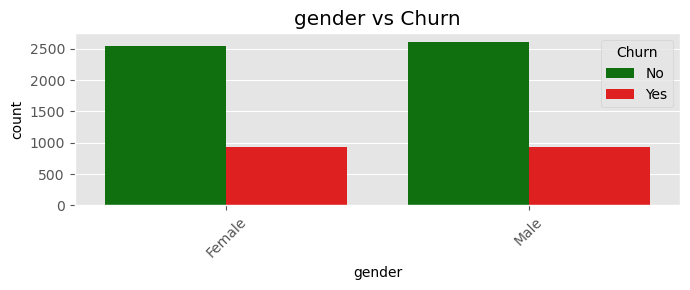

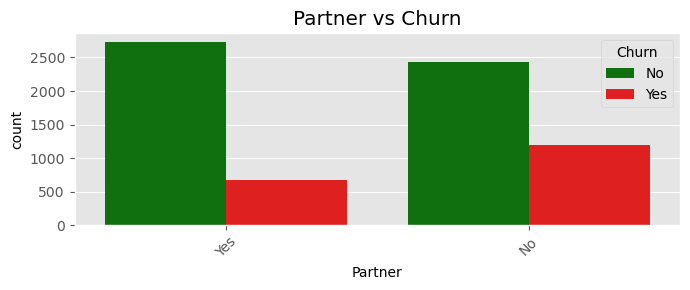

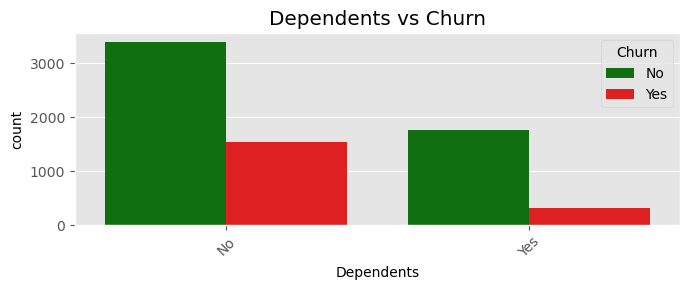

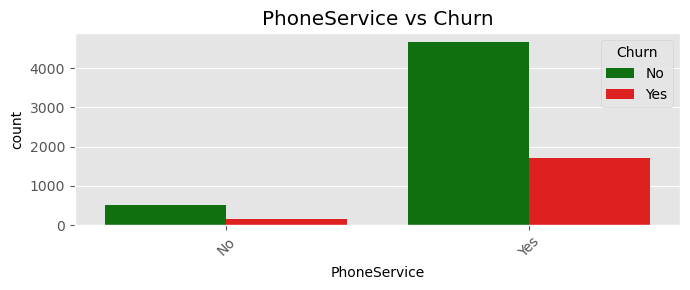

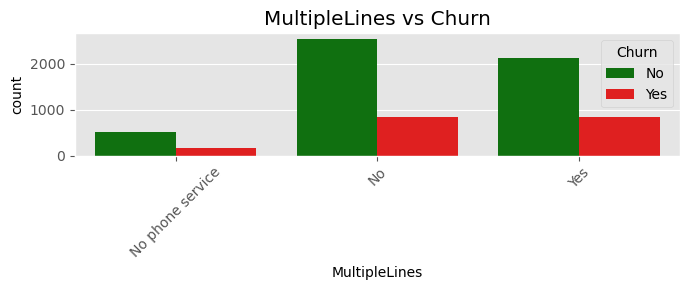

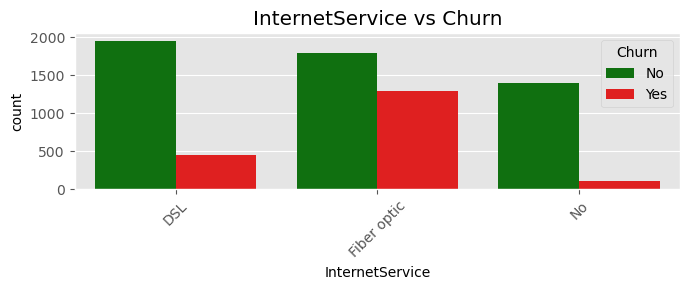

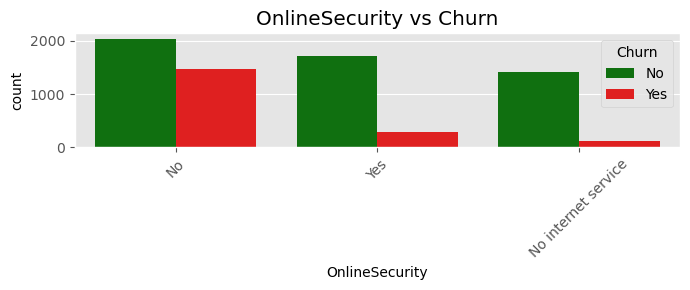

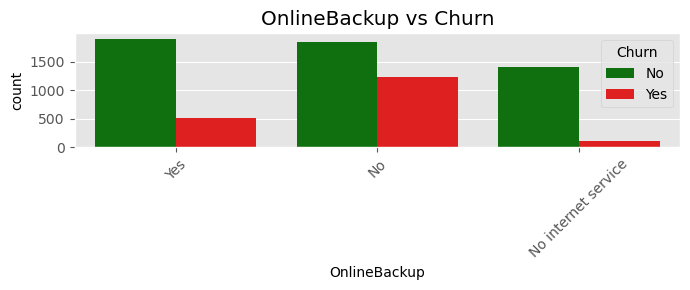

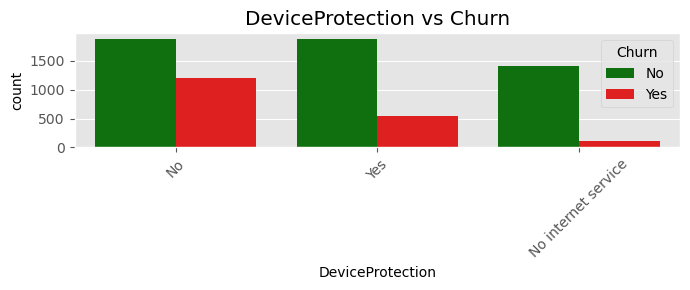

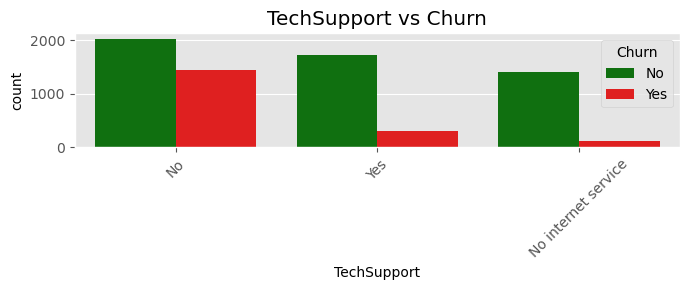

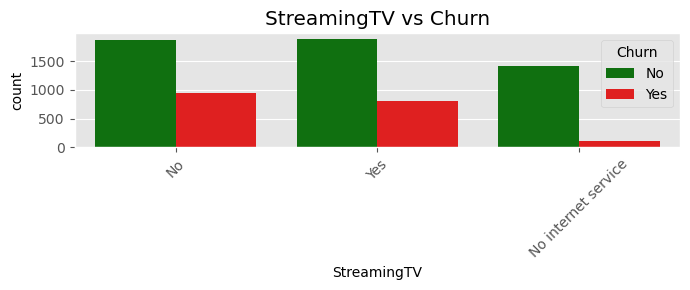

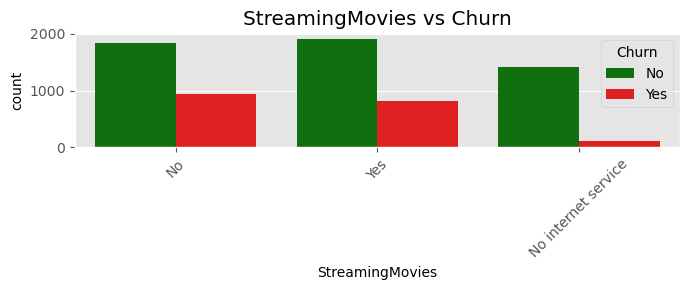

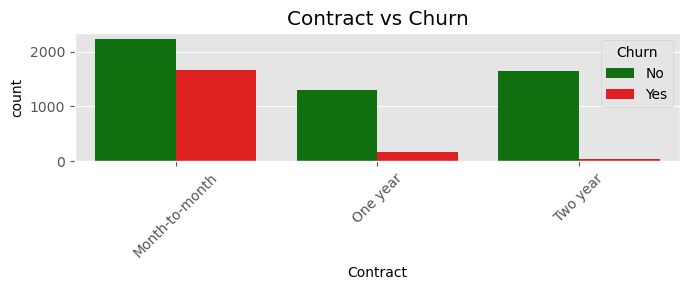

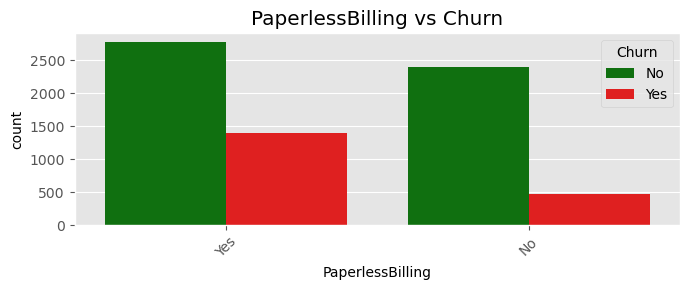

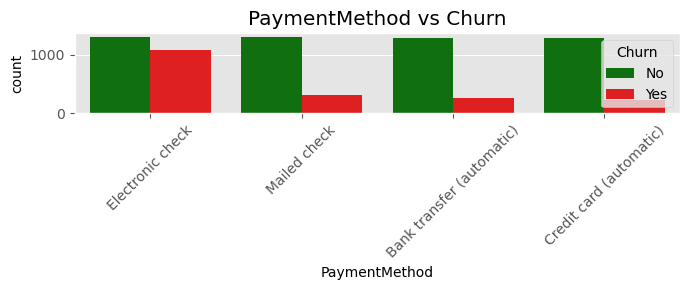

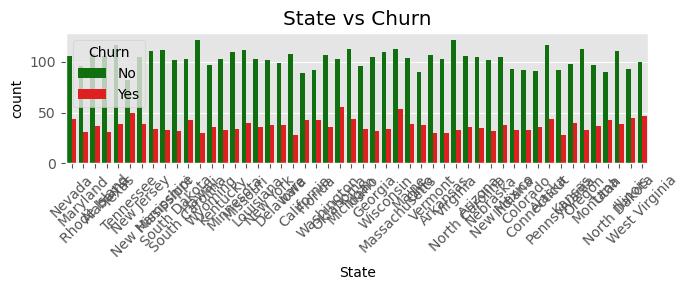

In [42]:
print("\nCategorical features")
print('-' * 25)
cat_feature = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'State']
for col in cat_feature:
    sns.countplot(data = main_data, x = col, hue = 'Churn', palette= custom_palette)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

**Comment:**
- `Gender` does not significantly influance churn behavior.
- `Partner & Dependents`: Customers without a partner churn more than those with a partner. Similarly, customers without dependents churn more and they also represent a larger portion of the customer base. Being in a household seems linked to greater customer retention.
- `Phone service & Multiple Lines`: Customers who use phone service churn more than those who don't, and we can see taht almost our customers use this service. For multiple lines, churn rates are similar for both users and non-users. Phone service may not be a strong loyalty factor, multiline offers does not significantly affect churn.
- `Internet service`: Chart indicates a higher churn rate among fiber optic users compared to DSL or no internet service, suggesting type impacts retention.
- For the `other services`, customers who do not use them churn more than those who do. A litte bit risk of churners expect for the Streaming services. These services may contribure to better engagement and satisfaction, acting as retention tools.
- `Contract`: Month-to-moth customers churn significantly more than those with 1 or 2 years contracts and it become occasional over time. It means that long term contracts reduce churn.
- `Bill preference`: Customers who use peperless billing chunr more than other.
- `Paiement methods`: Customer using electronic check have the highest churn rate, those paying by credit card churn the least. Bank transfer and mailed check users show moderate churn.

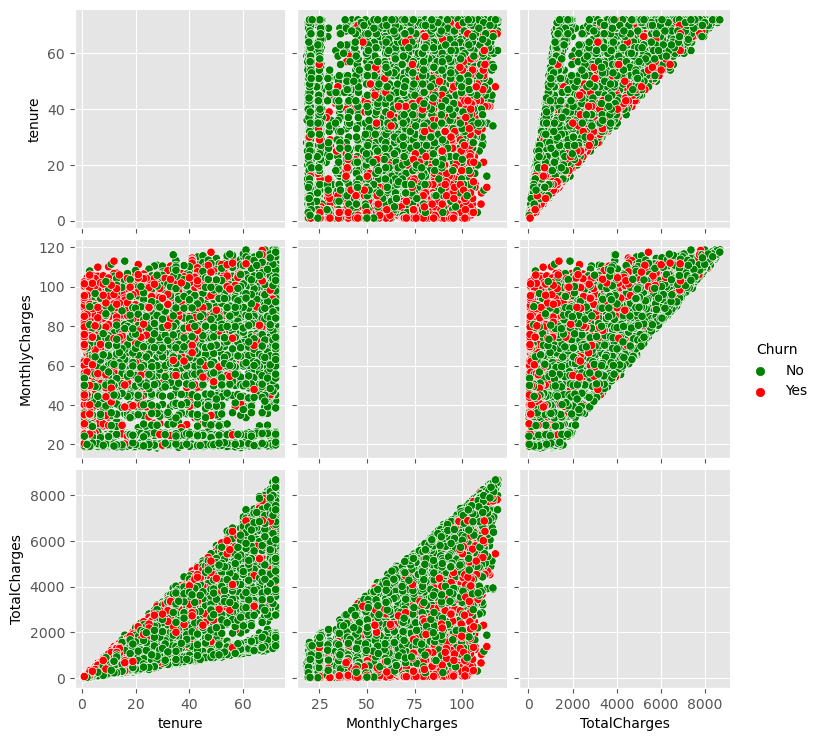

In [19]:
#MULTIVARIATE

#1. Pair plot for numericals features
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges'] 
sns.pairplot(main_data, vars = num_var, hue= 'Churn', diag_kind= "kkyt", palette= custom_palette)
plt.show()

**Comment:**
- **Tenure vs MonthlyCharges:** the scatter plot shows a weak, scattered relationship between tenure and monthly charges.Churners are more prevalent at shorter tenure and across various monthly charges, while non-churners dominate at longer tenure, suggesting that shorter tenure customers are more likely to churn regardless of monthly charges.
- **Tenure vs TotalCharges:** There is a clear positive correlation. Churners are concentrated at lower tenure and total charges, while non-churners are more common at higher tenure and total charges, indicating that customers with longer tenure and higher total charges are less likely to churn.
- **MonthlyCharges vs TotalCharges:** A positive relationship is evident, with higher monthly charges leading to higher total charges. Churners are more frequent at moderate to high monthly charges and lower total charges, while non-churners are spread across the range, suggesting that higher monthly charges might contribute to churn.

The pairplot indicates that churners are more associated with shorter tenure and lower total charges, while non-churners tend to have longer tenure and higher total charges. Monthly charges show a weaker influence, but higher values may slightly increase churn likelihood.

In [37]:
#2. Pivot table
pivot_state = main_data.pivot_table(values= 'Churn', index= 'State', columns= 'Contract', aggfunc= lambda x: (x == 'Yes').mean())
print(pivot_state)

Contract        Month-to-month  One year  Two year
State                                             
Alabama               0.384615  0.032258  0.055556
Alaska                0.414286  0.038462  0.026316
Arizona               0.493506  0.194444  0.000000
Arkansas              0.386667  0.111111  0.050000
California            0.385714  0.147059  0.056604
Colorado              0.367089  0.062500  0.021277
Connecticut           0.462500  0.120000  0.035714
Delaware              0.410256  0.258065  0.000000
Florida               0.475000  0.038462  0.038462
Georgia               0.439394  0.206897  0.000000
Hawaii                0.431818  0.192308  0.031250
Idaho                 0.392405  0.189189  0.030303
Illinois              0.441176  0.085714  0.000000
Indiana               0.432990  0.160000  0.000000
Iowa                  0.378641  0.047619  0.000000
Kansas                0.452632  0.195122  0.000000
Kentucky              0.359375  0.037037  0.034483
Louisiana             0.272727 

## Recommendations
### 1. Retention Strategies:
- Focus on customers with short tenure (<30 months) and offer incentives like discounts, loyalty programs to increase retention, given the negative correlation with churn.
- Target fiber optic users with improved service quality or bundled offers to reduce their higher churn rate compared to DSL users.

### 2. Pricing Adjustements:
- Investigate the impact of higher monthly charges on churn and consider tiered pricing or value-added services to mitigate the slight positive correlation with churn.
- Encourage longer-term contracts with benefits to shift customers from month-to-month plans, which are linked to higher churn.

### 3. Customer Segmentation:
- Develop targeted Campaigns for customers without parteners or dependents, who may represent a higher churn risk, by understanding thier specific needs.
- Promote alternative payement methods (beyond electronic check) to diversify payement behaviors anD potentially improve retention.